In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print("complete")

/kaggle/input/cvpdfdata/agaspar_cv.pdf
complete


In [2]:
!pip install tika
print("complete")

  Preparing metadata (setup.py) ... - done
  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32893 sha256=8d8db03110ce4c15476cb49b7b705f03654b0839ceb49784ce761c0cada2be05
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika
complete


In [3]:
path = r"../input/cvpdfdata/agaspar_cv.pdf"
#using Tika
#pip install tika
from tika import parser
raw = parser.from_file(path)
tika_text = raw['content'].replace('\n\n', '*')
#print(tika_text)
textList=[]
res=""
for i in tika_text:
    if i=='*':
        if len(res)>0:
            textList.append(res)
            res=""
    else:
        res+=i
#print(len(textList))
#print(textList)



print("complete")

2022-08-28 08:55:34,661 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2022-08-28 08:55:41,453 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2022-08-28 08:55:43,139 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


complete


In [4]:
# to do : do partial match , i.e. word+etc

reference=["Contact","Education","Honors","awards","Meetings","Publications",
           "Research","Appointments","Proposals","Services","Observing", "Experience",
          "Grants","Current","Teaching","Teaching","Outreach","Students",
          "Conference","Citations"]
collectedText=[]
collectedByDictionary=dict()
collectedParts=dict()
keyDictionary=""
temp=[]

#print(len(textList))


for j in textList:
   
    for k in j.split():
        #if j=='Observing\nExperience':
        #    print("saaaa")
        
        if k in reference:
            collectedText.append(temp)
            if keyDictionary in collectedByDictionary:
                collectedByDictionary[keyDictionary]=collectedByDictionary[keyDictionary]+temp
            else:
                collectedByDictionary[keyDictionary]=temp
            keyDictionary=k
            temp=[]
            break
        #print(k)
    temp.append(j)
    
    #print(j)
collectedText.append(temp)
if keyDictionary in collectedByDictionary:
    collectedByDictionary[keyDictionary]=collectedByDictionary[keyDictionary]+temp
else:
    collectedByDictionary[keyDictionary]=temp

#collectedByDictionary['Publications']=collectedByDictionary['Citations']
#print(collectedText)
#print(collectedByDictionary.keys())
#print(collectedByDictionary[''])
#print("************-------------------****************")
#print(collectedByDictionary['Citations'])


print("complete")

complete


In [5]:
#Name
import spacy
from spacy.matcher import Matcher

# load pre-trained model
nlp = spacy.load('en_core_web_sm')

# initialize matcher with a vocab
matcher = Matcher(nlp.vocab)
def extract_name(resume_text):
    nlp_text = nlp(resume_text)
    
    # First name and Last name are always Proper Nouns
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    
    matcher.add('NAME', [pattern], on_match = None)
    
    matches = matcher(nlp_text)
    
    for match_id, start, end in matches:
        span = nlp_text[start:end]
        return span.text
    
    
name = extract_name(tika_text)
print(name)
print("complete")

András Gáspár
complete


In [6]:
import re
from datetime import datetime
def getDate(dataMaybeDate):
    

    match = re.match(r'.*([1-3][0-9]{3})', dataMaybeDate)
    if match is not None:
        # Then it found a match!
        #print(match.group(1))
        return match.group()
    return None
getDate('2014 - 2011 current Senior Research Associate')
print("complete")

complete


In [7]:


allCVData=[]
#print(collectedByDictionary.keys())




def getDataTriple(relation):
    #keyCV="Contact"
    tempData=collectedByDictionary[relation]
    if relation=="":
        relation="basic information"
    for i in tempData:
        tempText=i.split("\n")
        #print(tempText)
    
    
        for j in tempText:
            
            tempTriple=(name,relation,j)
            if tempTriple not in allCVData:
                allCVData.append(tempTriple)
            
            # try to get more data
            #print(j)
            tempCVData=j.split(",")
            #print(tempCVData)
            xtemp=getDate(j)
            if xtemp:

                j=j.split(",")
                if len(j)<1:
                    continue
                #print(xtemp,"aa",j)
                
                temp002=(relation,"done in",xtemp)
                allCVData.append(temp002)
                if len(j[0])>0:
                    temp003=(name,"as",j[0])
                    allCVData.append(temp003)
                
                
                for mn in j:
                    if len(mn)>0:
                        temp004=(relation,"with",mn)
                        allCVData.append(temp004)
            #j=nlp(j)
            #for k in j:
            #    print(k.dep_," : ",k)

print(collectedByDictionary.keys())    

#getDataTriple("Research")
#print(allCVData)

dict_keys(['', 'Contact', 'Research', 'Education', 'Appointments', 'Grants', 'Observing', 'Current', 'Outreach', 'Students', 'awards', 'Conference', 'Meetings', 'Services', 'Publications', 'Citations'])


In [8]:
#E-MAIL
import re
def get_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

email = get_email_addresses(tika_text)
email=list(set(email))
em=email[0]
print(em)
allCVData.append((name,"email",em))

#print(type(email))
print(email)

#extracted_text["E-Mail"] = email
print("complete")

agaspar@as.arizona.edu
['agaspar@as.arizona.edu']
complete


In [9]:
#for Educational Institute
import re
sub_patterns = ['[A-Z][a-z]* University','[A-Z][a-z]* Educational Institute',
                '[A-Z][a-z]* College',
                'University of [A-Z][a-z]*',
                'Ecole [A-Z][a-z]*']
pattern = '({})'.format('|'.join(sub_patterns))
matches = re.findall(pattern, tika_text)

#extracted_text["Institutes"] = matches
matches
print(matches)
print("complete")

['The University', 'The University', 'The University', 'University of Szeged', 'Community College', 'University of Leeds', 'Community College', 'University of Szeged', 'University of Szeged', 'The University', 'The University']
complete


In [10]:
for keyCV in collectedByDictionary:
    getDataTriple(keyCV)

    
#allCVData=(set(allCVData))
print(allCVData)

[('András Gáspár', 'email', 'agaspar@as.arizona.edu'), ('András Gáspár', 'basic information', 'András Gáspár 12/10/2016'), ('basic information', 'done in', 'András Gáspár 12/10/2016'), ('András Gáspár', 'as', 'András Gáspár 12/10/2016'), ('basic information', 'with', 'András Gáspár 12/10/2016'), ('András Gáspár', 'Contact', 'Contact'), ('András Gáspár', 'Contact', 'Information'), ('András Gáspár', 'Contact', 'Steward Observatory'), ('András Gáspár', 'Contact', 'The University of Arizona'), ('András Gáspár', 'Contact', '933 N Cherry Avenue, Rm 278'), ('András Gáspár', 'Contact', 'Tucson, AZ 85721-0065'), ('András Gáspár', 'Contact', 'Tel: (520)-360-0983'), ('András Gáspár', 'Contact', 'agaspar@as.arizona.edu'), ('András Gáspár', 'Contact', 'http://merope.as.arizona.edu/˜agaspar'), ('András Gáspár', 'Contact', 'U.S. permanent resident'), ('András Gáspár', 'Research', 'Research'), ('András Gáspár', 'Research', 'Areas'), ('András Gáspár', 'Research', 'Circumstellar Disks, Exozodi, Extrasol

In [11]:
import csv

#write.csv(allCVData, "mycsv.csv")

header = ['head','relation','tail']

with open('CVpdfData.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(allCVData)

path001 = r"./CVpdfData.csv"
#using Tika
#pip install tika
from tika import parser
raw001 = parser.from_file(path001)
print(raw001['content'])












	head	relation	tail
	András Gáspár	email	agaspar@as.arizona.edu
	András Gáspár	basic information	András Gáspár 12/10/2016
	basic information	done in	András Gáspár 12/10/2016
	András Gáspár	as	András Gáspár 12/10/2016
	basic information	with	András Gáspár 12/10/2016
	András Gáspár	Contact	Contact
	András Gáspár	Contact	Information
	András Gáspár	Contact	Steward Observatory
	András Gáspár	Contact	The University of Arizona
	András Gáspár	Contact	933 N Cherry Avenue, Rm 278
	András Gáspár	Contact	Tucson, AZ 85721-0065
	András Gáspár	Contact	Tel: (520)-360-0983
	András Gáspár	Contact	agaspar@as.arizona.edu
	András Gáspár	Contact	http://merope.as.arizona.edu/˜agaspar
	András Gáspár	Contact	U.S. permanent resident
	András Gáspár	Research	Research
	András Gáspár	Research	Areas
	András Gáspár	Research	Circumstellar Disks, Exozodi, Extrasolar Planets, Variable Stars, Open Clus-
	András Gáspár	Research	ters, ISM, Coronagraphy, Infrared Detectors, HPC/GPU programming
	András Gáspár	Resea

In [12]:
print(allCVData[0][0])
print("complete")


András Gáspár
complete


In [13]:
print(len(allCVData))

739


In [14]:
print("complete")

complete


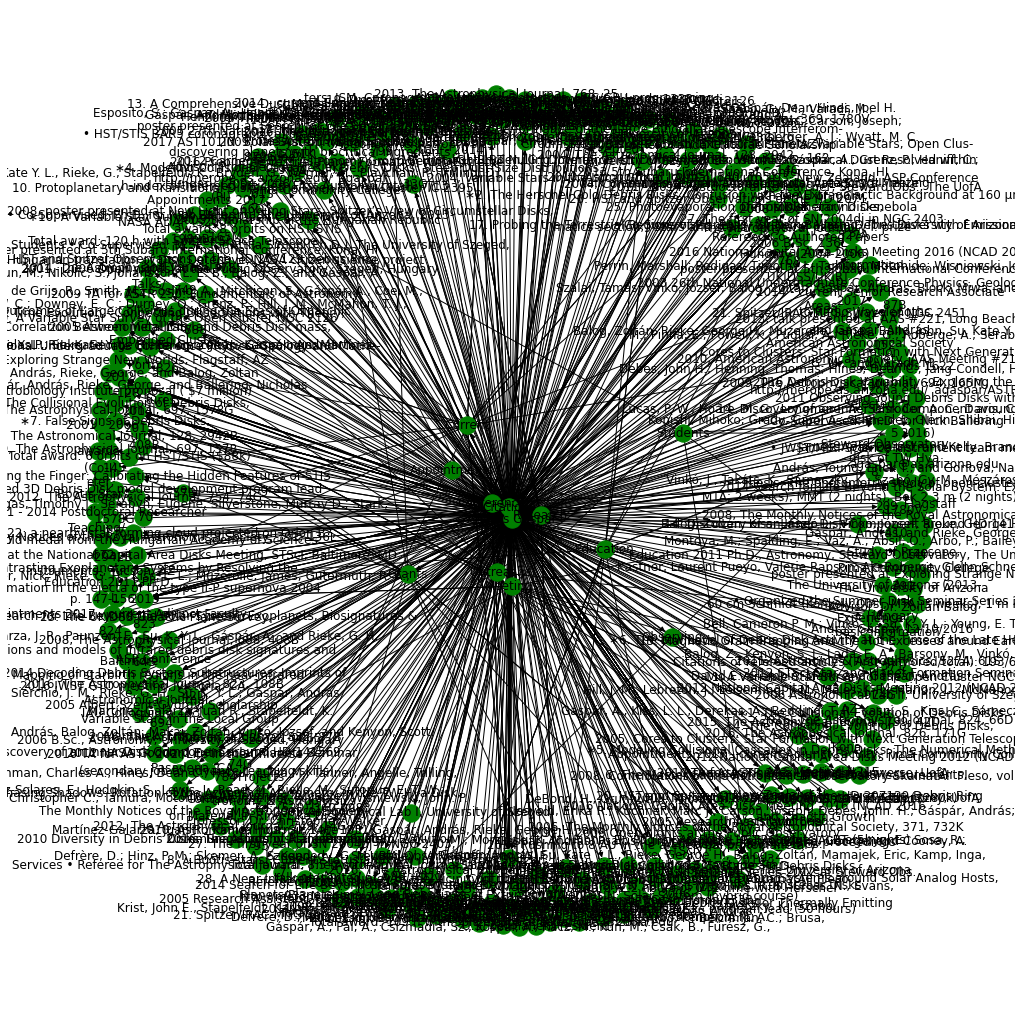

In [15]:
import networkx as ntx
import matplotlib.pyplot as plot


source = [j[0] for j in allCVData]
#print(source)
#object extraction
target = [k[2] for k in allCVData]
#print(target)
relations=[l[1] for l in allCVData]
#print(relations)

data_kgf = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
# Create DG from the dataframe
graph = ntx.from_pandas_edgelist(data_kgf, "source", "target",
                         edge_attr=True, create_using=ntx.MultiDiGraph())
# plotting the network
plot.figure(figsize=(14, 14))
posn = ntx.spring_layout(graph)
ntx.draw(graph, with_labels=True, node_color='green', edge_cmap=plot.cm.Blues, pos = posn)
plot.show()